In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# 1.  Genere 1,000,000 de parejas de números (x,y) con una función de densidad uniforme de cada componente entre 0 y 1.  

In [2]:
def linearFunction(m1=0, m2=0, x1=0, x2=0, noise=0):
  r = m1*x1 + m2*x2 + noise
  return r

def getFunction(num_samples, m1, m2, noise=[]):
  x = np.arange(0, num_samples, dtype=float)
  x[0] = linearFunction(m1, m2, 0, 0, noise[0])
  x[1] = linearFunction(m1, m2, x[0], 0, noise[1])
  for i in range(2, num_samples):
      x[i] = linearFunction(m1, m2, x[i - 1], x[i - 2], noise[i])
  return x

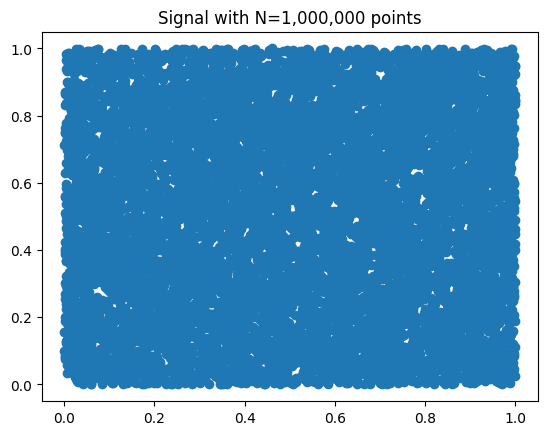

In [3]:
mean = 0
std = 1
num_samples = 10000
signal = [np.random.uniform(0, 1, size=num_samples), np.random.uniform(0, 1, size=num_samples)]

# m1 = 0.6530
# m2 = -0.7001
# signal_y = getFunction(num_samples, m1, m2, signal_x)
# signal_y = signal_y/max(signal_y)

# signal = [signal_x, signal_y]

# utils.beautyPlot2(x=signal_x, y=signal_y, title='1 Million points signal')
# plt.scatter(signal[0][:10000], signal[1][:10000])
# plt.title('1 Million points signal')
# plt.show()

plt.scatter(signal[0], signal[1])
plt.title("Signal with N=1,000,000 points")
# plt.title("Signal with N=" + str(len(signal[0])) + " points")
plt.show()

In [4]:
signal_t = np.array(signal).T
signal_t
# signal_t = np.array([signal_x, signal_y]).T
# signal_t
# signal_t = signal_t.T

# [signal_t.append([signal_x[i], signal_y[i]]) for i in range(len(signal_x))]
# print(signal_x)
# print(signal_x.T)

# print(len(signal_x))
# print(len(signal_x.T))

array([[0.14891012, 0.85793964],
       [0.23713235, 0.41017722],
       [0.53816635, 0.41822048],
       ...,
       [0.39765691, 0.14150621],
       [0.30193705, 0.00303512],
       [0.01459248, 0.5237506 ]])

# Cuantizador vectorial usando el algoritmo de Linde-Buzo-Gray para 1, 2, 4,8, 16, 64 y 256 regiones. Gráfique con colores la posición de los puntos en las diferentes regiones del cuantizador. e1 = {0.0,0.001} y una e2 = {0.0,-0.001}

In [5]:
import matplotlib.pyplot as plt
import lbg
from collections import defaultdict

EPSILON = np.random.random()

def quantize_and_plot(signal, distance_function=lbg.euclid_squared, number_of_regions=1, epsilon=0.001):
    codebook = lbg.lbg(signal, distance_function, number_of_regions, epsilon)

    centroids_dic = defaultdict(list)
    for i, v in enumerate(codebook):
        code_key = tuple(v)
        centroids_dic[code_key]

    for i, v in enumerate(signal):
        code_key = tuple(codebook[i])
        centroids_dic[code_key].append(v)

    for signal_points in centroids_dic.values():
      regions = np.array(signal_points).T
      plt.title("Signal with " + str(number_of_regions) + " regions. Epsilon=" + str(epsilon)) 
      plt.scatter(regions[0], regions[1], color=np.random.rand(3,))

In [6]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 1, EPSILON)

In [7]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 2, EPSILON)

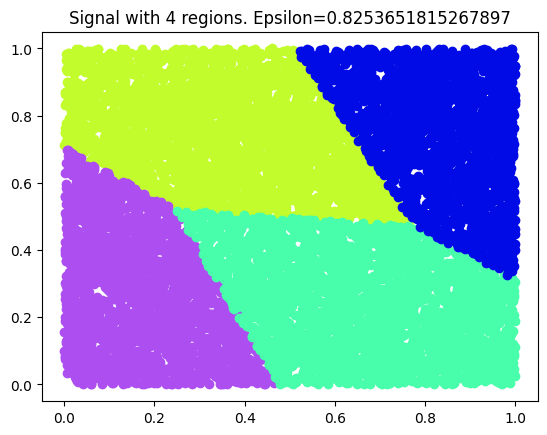

In [8]:
quantize_and_plot(signal_t, lbg.euclid_squared, 4, EPSILON)

In [9]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 8, EPSILON)

In [10]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 16, EPSILON)

In [11]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 32, EPSILON)

In [12]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 64, EPSILON)

In [13]:
# quantize_and_plot(signal_t, lbg.euclid_squared, 256, EPSILON)

# 2. Con los mismos puntos generados en el punto anterior encuentre las mismas regiones con el algoritmo de K-medias, grafique estas y comparé con los obtenidos en el punto anterior.

In [14]:
from sklearn.cluster import KMeans

def quantize_and_plot_with_kmeans(signal, number_of_regions=1):
    kmeans = KMeans(n_clusters=number_of_regions,
                    random_state=0, n_init="auto")
    
    codebook = kmeans.fit(signal).cluster_centers_
    codebook_indexes = kmeans.fit(signal).predict(signal)

    centroids_dic = defaultdict(list)
    for i, v in enumerate(codebook):
        code_key = tuple(v)
        centroids_dic[i]

    for i, v in enumerate(signal):
        code_key = codebook_indexes[i]
        centroids_dic[code_key].append(v)

    for signal_points in centroids_dic.values():
      regions = np.array(signal_points).T
      plt.title("K-Means - Signal with " + str(number_of_regions) +
                " regions")
      plt.scatter(regions[0], regions[1], color=np.random.rand(3,))

In [15]:
# quantize_and_plot_with_kmeans(signal_t, 1)

In [16]:
# quantize_and_plot_with_kmeans(signal_t, 2)

In [17]:
# quantize_and_plot_with_kmeans(signal_t, 4)
# signal_t

In [18]:
# quantize_and_plot_with_kmeans(signal_t, 8)

In [19]:
# quantize_and_plot_with_kmeans(signal_t, 16)

In [20]:
# quantize_and_plot_with_kmeans(signal_t, 32)

In [21]:
# quantize_and_plot_with_kmeans(signal_t, 64)

In [22]:
# quantize_and_plot_with_kmeans(signal_t, 256)

# Lectura de audios de numeros

In [23]:
import scipy
import soundfile as sf
import os
import glob
from collections import defaultdict

# Path where the videos are located
audio_dir = './numero_audios/'
extension = '*.wav'
wav_dir = './wav/'
wav_location = audio_dir + 'wav/'
sample_rate = 16000


wav_audios_dictionary = defaultdict(list)
# os.chdir(audio_dir)
for m4a in glob.glob(wav_location + extension):
    wav_file_name = os.path.splitext(os.path.basename(m4a))[1] + '.wav'
    wav_file_location = wav_location + wav_file_name
    s_sound, s_rate = sf.read(wav_file_location)
    sound_samples_16 = scipy.signal.resample(s_sound, sample_rate)
    wav_audios_dictionary[wav_file_name] = sound_samples_16

In [24]:
# import matplotlib.pyplot as plt
# # plt.scatter(wav_audios_dictionary['1 1.wav'])
# plt.plot(wav_audios_dictionary['1 1.wav'])

In [25]:

# import matplotlib.pyplot as plt

# a, b = sf.read('./numero_audios/wav/1 1.wav')
# plt.plot(a)


# glob.glob('./numero_audios/wav/*.wav')
# print(audio_dir + 'wav/' + extension)

# glob.glob(audio_dir + 'wav/' + extension)

In [26]:
# import os
# os.getcwd()

# 4. Aplicación de filtro de preénfasis

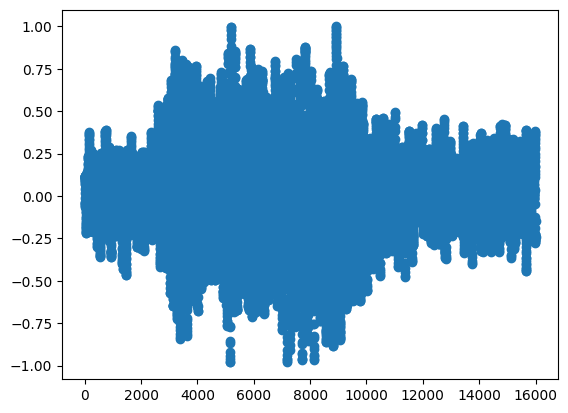

In [27]:
import preenfasis

wav_audios_preenfasis_dictionary = defaultdict(list)
for k, audio in wav_audios_dictionary.items():
  wav_audios_preenfasis_dictionary[k] = preenfasis.preenfasis(audio)

X = list(range(0, len(wav_audios_dictionary['1 1.wav'])))
plt.title('Voice signal scattered for UNO')
plt.scatter(X, wav_audios_dictionary['1 1.wav'])


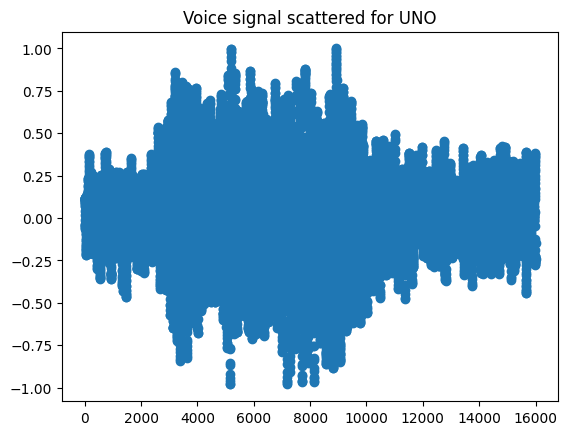

In [63]:
X = list(range(0, len(wav_audios_dictionary['1 1.wav'])))
plt.title('Voice signal scattered for UNO')
plt.scatter(X, wav_audios_dictionary['2 1.wav'])

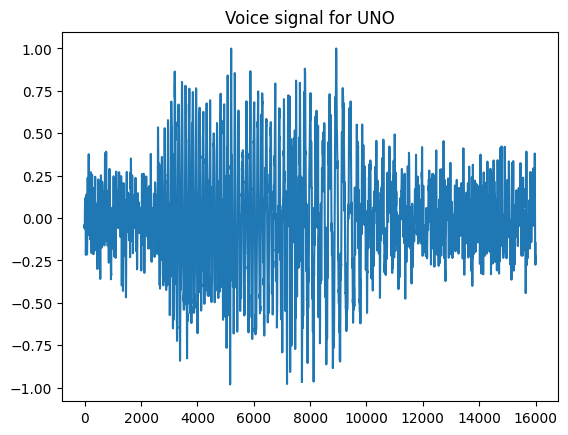

In [66]:
plt.title('Voice signal for UNO')
plt.plot(wav_audios_dictionary['1 1.wav'])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

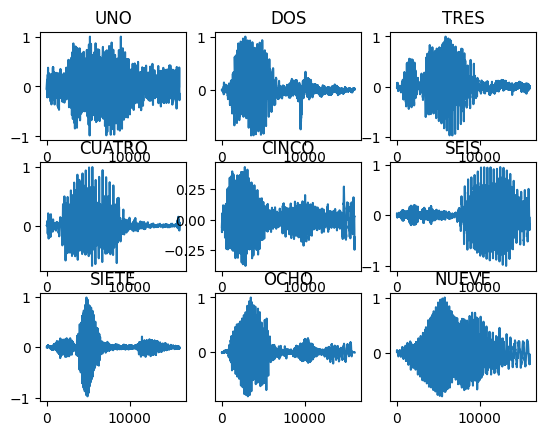

In [70]:
plt.figure(figsize=(10, 6))
f, axis = plt.subplots(3, 3)
axis[0, 0].plot(wav_audios_dictionary['1 1.wav'])
axis[0, 0].set_title('UNO')
axis[0, 1].plot(wav_audios_dictionary['2 1.wav'])
axis[0, 1].set_title('DOS')
axis[0, 2].plot(wav_audios_dictionary['3 1.wav'])
axis[0, 2].set_title('TRES')
axis[1, 0].plot(wav_audios_dictionary['4 1.wav'])
axis[1, 0].set_title('CUATRO')
axis[1, 1].plot(wav_audios_dictionary['5 1.wav'])
axis[1, 1].set_title('CINCO')
axis[1, 2].plot(wav_audios_dictionary['6 1.wav'])
axis[1, 2].set_title('SEIS')
axis[2, 0].plot(wav_audios_dictionary['7 1.wav'])
axis[2, 0].set_title('SIETE')
axis[2, 1].plot(wav_audios_dictionary['8 1.wav'])
axis[2, 1].set_title('OCHO')
axis[2, 2].plot(wav_audios_dictionary['9 1.wav'])
axis[2, 2].set_title('NUEVE')
plt.show

# Aplicar ventana de Hamming de 160 puntos, corriendose 64 muestras a cada señal de voz 

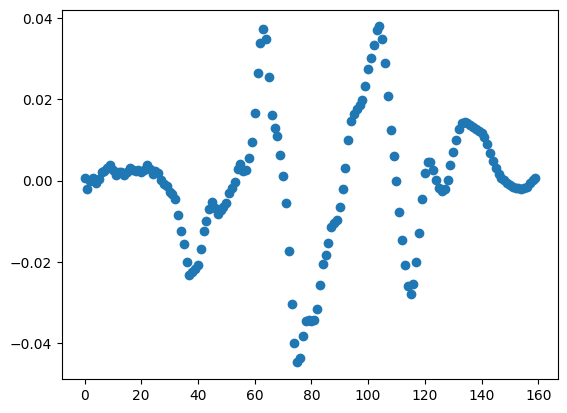

In [34]:
import hamming

window_phase = 64
window_size = 160

wav_audios_hamming_dictionary = defaultdict(list)
for k, audio in wav_audios_preenfasis_dictionary.items():
  wav_audios_hamming_dictionary[k] = hamming.hamming_window(
      audio, window_size, window_phase)[1]



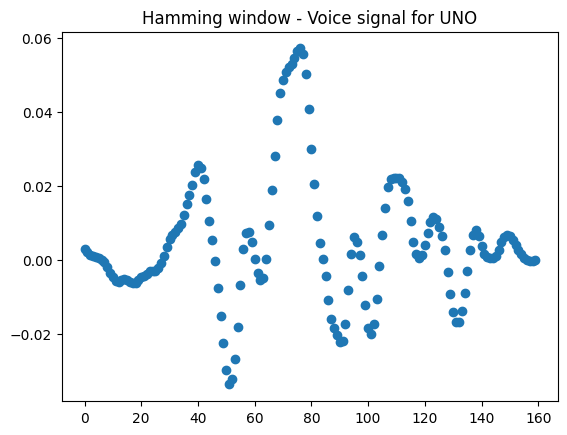

In [71]:
plt.title('Hamming window - Voice signal for UNO')
hammings = wav_audios_hamming_dictionary['1 1.wav']
plt.scatter(X[:window_size], hammings[1])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

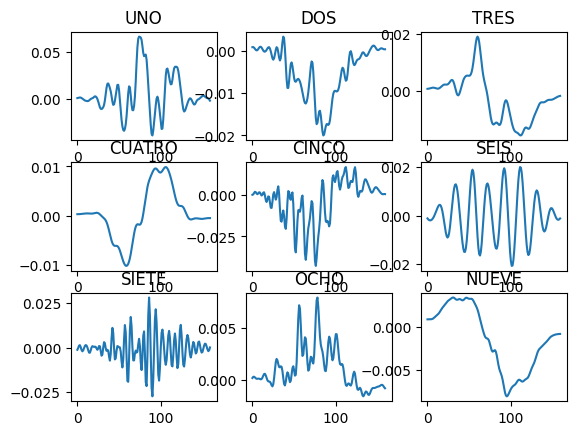

In [72]:
plt.figure(figsize=(10, 6))
f, axis = plt.subplots(3, 3)
axis[0, 0].plot(wav_audios_hamming_dictionary['1 1.wav'][10])
axis[0, 0].set_title('UNO')
axis[0, 1].plot(wav_audios_hamming_dictionary['2 1.wav'][10])
axis[0, 1].set_title('DOS')
axis[0, 2].plot(wav_audios_hamming_dictionary['3 1.wav'][10])
axis[0, 2].set_title('TRES')
axis[1, 0].plot(wav_audios_hamming_dictionary['4 1.wav'][10])
axis[1, 0].set_title('CUATRO')
axis[1, 1].plot(wav_audios_hamming_dictionary['5 1.wav'][10])
axis[1, 1].set_title('CINCO')
axis[1, 2].plot(wav_audios_hamming_dictionary['6 1.wav'][10])
axis[1, 2].set_title('SEIS')
axis[2, 0].plot(wav_audios_hamming_dictionary['7 1.wav'][10])
axis[2, 0].set_title('SIETE')
axis[2, 1].plot(wav_audios_hamming_dictionary['8 1.wav'][10])
axis[2, 1].set_title('OCHO')
axis[2, 2].plot(wav_audios_hamming_dictionary['9 1.wav'][10])
axis[2, 2].set_title('NUEVE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

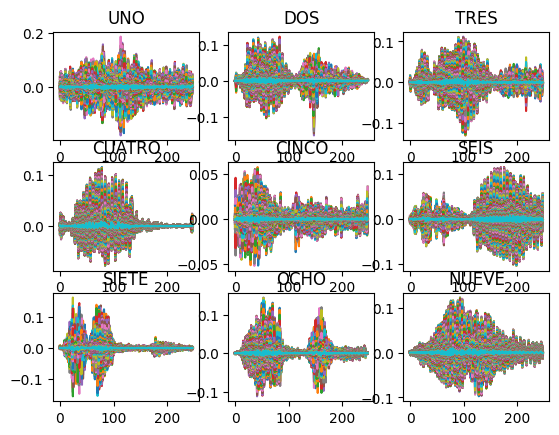

In [60]:
plt.figure(figsize=(10, 6))
f, axis = plt.subplots(3, 3)
axis[0, 0].plot(wav_audios_hamming_dictionary['1 1.wav'][:])
axis[0, 0].set_title('UNO')
axis[0, 1].plot(wav_audios_hamming_dictionary['2 1.wav'][:])
axis[0, 1].set_title('DOS')
axis[0, 2].plot(wav_audios_hamming_dictionary['3 1.wav'][:])
axis[0, 2].set_title('TRES')
axis[1, 0].plot(wav_audios_hamming_dictionary['4 1.wav'][:])
axis[1, 0].set_title('CUATRO')
axis[1, 1].plot(wav_audios_hamming_dictionary['5 1.wav'][:])
axis[1, 1].set_title('CINCO')
axis[1, 2].plot(wav_audios_hamming_dictionary['6 1.wav'][:])
axis[1, 2].set_title('SEIS')
axis[2, 0].plot(wav_audios_hamming_dictionary['7 1.wav'][:])
axis[2, 0].set_title('SIETE')
axis[2, 1].plot(wav_audios_hamming_dictionary['8 1.wav'][:])
axis[2, 1].set_title('OCHO')
axis[2, 2].plot(wav_audios_hamming_dictionary['9 1.wav'][:])
axis[2, 2].set_title('NUEVE')
plt.show

# 5. Optención de coeficientes de Wiener de orden 12

ValueError: x and y must be the same size

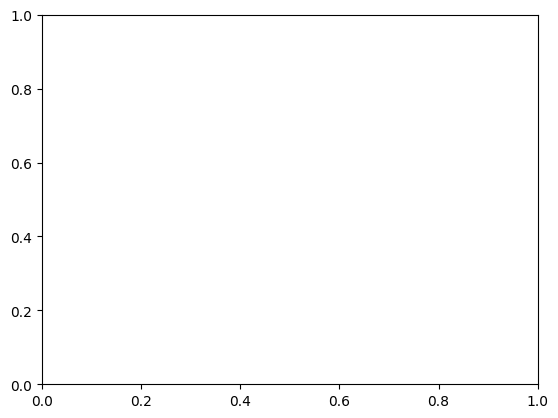

In [38]:
import correlation

m_order = 12
wav_audios_auto_correlations_dictionary = defaultdict(list)
wav_audios_auto_correlations_matrix_dictionary = defaultdict(list)
for k, windows in wav_audios_hamming_dictionary.items():
    wav_audios_auto_correlations_dictionary[k] = [correlation.crossCorrelationVector(
        hams, m_order, window_size - m_order) for hams in windows]

    number_of_hammings = len(wav_audios_auto_correlations_dictionary[k])
    wav_audios_auto_correlations_matrix_dictionary[k] = [correlation.createAutoCorrelationMatrix(
        correlation_vectors, 12) for correlation_vectors in wav_audios_auto_correlations_dictionary[k]]

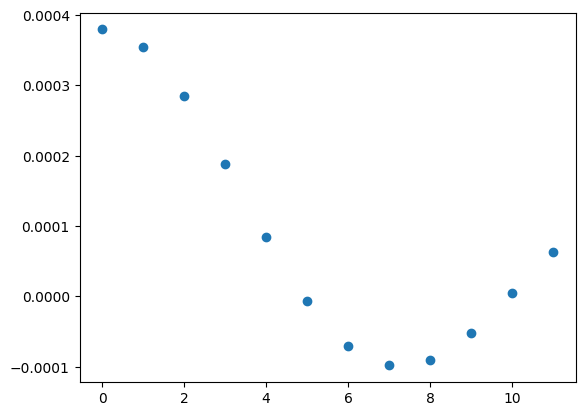

In [52]:

auto_correlation_vector = wav_audios_auto_correlations_dictionary['1 1.wav'][12]
plt.scatter(X[:len(auto_correlation_vector)], auto_correlation_vector)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

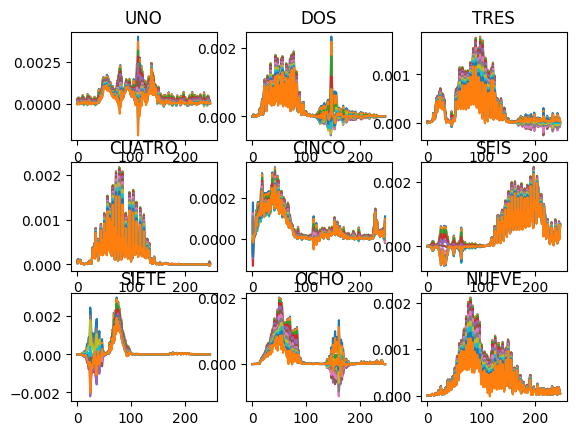

In [61]:
plt.figure(figsize=(10, 6))
f, axis = plt.subplots(3, 3)
axis[0, 0].plot(wav_audios_auto_correlations_dictionary['1 1.wav'][:])
axis[0, 0].set_title('UNO')
axis[0, 1].plot(wav_audios_auto_correlations_dictionary['2 1.wav'][:])
axis[0, 1].set_title('DOS')
axis[0, 2].plot(wav_audios_auto_correlations_dictionary['3 1.wav'][:])
axis[0, 2].set_title('TRES')
axis[1, 0].plot(wav_audios_auto_correlations_dictionary['4 1.wav'][:])
axis[1, 0].set_title('CUATRO')
axis[1, 1].plot(wav_audios_auto_correlations_dictionary['5 1.wav'][:])
axis[1, 1].set_title('CINCO')
axis[1, 2].plot(wav_audios_auto_correlations_dictionary['6 1.wav'][:])
axis[1, 2].set_title('SEIS')
axis[2, 0].plot(wav_audios_auto_correlations_dictionary['7 1.wav'][:])
axis[2, 0].set_title('SIETE')
axis[2, 1].plot(wav_audios_auto_correlations_dictionary['8 1.wav'][:])
axis[2, 1].set_title('OCHO')
axis[2, 2].plot(wav_audios_auto_correlations_dictionary['9 1.wav'][:])
axis[2, 2].set_title('NUEVE')
plt.show

# Calculo de cuantizadores usando LBG

# 6. Matriz de confusión

In [ ]:
from collections import defaultdict
# a = [ [1, 2] , [3, 4], [5, 6]]
# for i, v in enumerate(a):
#   print(v)

# for i, v in enumerate(signal):
#   print(v)

# print(signal_x)

# np.empty((10, 2))
# print(c_book_4)

# a = [-0.0003327734573696915, -0.00004651274101294111]
# np.multiply(a,0.001)

# # c1 = regions[i]*epsilon
# codebook = [[None, None]]
# codebook[0] = [1, 1]
#codebook[0]
# codebook.append([2,2])
# codebook[1]

dic = dict.fromkeys([1, 2, 3], list())
dic[1] = list()
dic[2].append([3,4])
dic[1].append([5,6])
dic

mylist = [[1, 1], [2, 1], [1, 2], [3, 1], [4, 2], [5,4]]
myRegions = [[1, 1], [1, 1], [1, 1], [2, 2],  [2, 2], [3, 3]]
dictionary = defaultdict(list)
for i, val in enumerate(mylist):
  key = tuple(myRegions[i])
  dictionary[key].append(val)

# print(dictionary)
# b = dictionary[(1,1)]
# print(b)
# a = np.array(dictionary[(1,1)]).T
# print(a)
# print(a[:][0])
# print(a[:][1])

# sum(a[:][0])
# sum(a[:][1])

# [sum(a[:][i]) for i in range(len(a))]

# np.divide([sum(a[:][i]) for i in range(len(a))], 2)



# for key, value in dictionary.items():
# print([key for key, value in dictionary.items()])

import math

a = math.sqrt(sum((x_a - x_b) ** 2 for x_a, x_b in zip([4,4], [2,2])))
a


a = [0.4713676321148945, -0.0283631422832364]
c1 = [-0.739854825688408, -0.18920586910939377]
c2 = [-0.741854825688408, -0.19120586910939377]

a1 = math.sqrt((a[0] - c1[0])**2 + (a[1] - c1[1])**2)
a2 = math.sqrt((a[0] - c2[0])**2 + (a[1] - c2[1])**2)
[a1, a2]

# Checkig for empty array
a = []

a if len(a) != 0 else print("list is a empty")
a = [1, 1]
a if len(a) != 0 else print("list is a empty")

b = np.array([10,10])
b if len(b) != 0 else print("list is empty")


In [ ]:
from glob import glob
from pydub import AudioSegment

# playlist_songs = [AudioSegment.from_file(
#     m4a_file) for m4a_file in glob(os.getcwd() + "/numero_audios/*.m4a")]

In [ ]:
from pydub import AudioSegment
import glob
import os

# Path where the videos are located
audio_dir = './numero_audios/'
extension = '*.m4a'
destination = './wav/'

# os.chdir(audio_dir)
# for m4a in glob.glob(extension):
#     wav_filename = destination + os.path.splitext(os.path.basename(m4a))[0] + '.wav'
#     AudioSegment.from_file(m4a).export(wav_filename, format='wav')

In [4]:
import glob
import os


# audio_dir = './numero_audios/'
# os.chdir(audio_dir)

# extension = '*.m4a'
# a = glob.glob(extension)
# wav_filename = '/wav/' + os.path.splitext(os.path.basename(a[0]))[0] + '.wav'
# wav_filename

import scipy

print(scipy.__version__)

1.13.0


In [8]:
import os

dataset_directory = 'numero_audios'
labels = next(os.walk(dataset_directory))[1]
labels

['wav']